In [32]:
# imports
import numpy as np
import matplotlib.pyplot as plt 

Variables de entrada:
  - DISTANCIA entre el robot y la pelota
    * muy cerca, cerca, lejos, muy lejos
  - ÁNGULO entre el vector formado por el robot y la pelota y
    el vector de dirección del movimiento del robot
    * muy izquierda, izquierda, centro, derecha, muy derecha

Variables de salida:
 - VELOCIDAD LINEAL velocidad a la que avanza el robot
   * super rápido, muy rápido, rápido, lento, muy lento, super lento
 - VELOCIDAD ANGULAR velocidad a la que gira el robot
   * rápida positiva, rápida negativa, cero, lenta positiva, lenta negativa

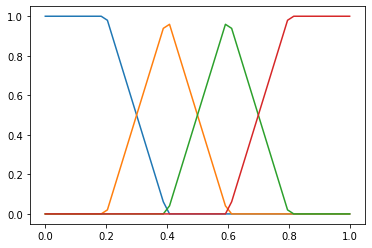

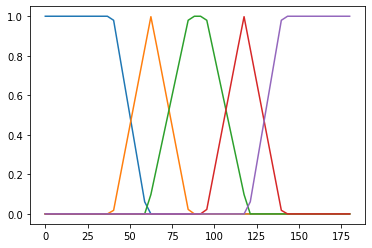

In [33]:
# Funciones de pertenencia
def fun_liminf(limp, lims, x):
    m = 1/(lims - limp)
    if(x < limp):
        y = 1
    elif(x >= lims):
        y = 0
    else:
        y = -m*(x-limp) + 1
    return y

def fun_base(limi, lims, x):
    limm = (lims-limi)/2 + limi
    m = 1/(lims - limm)
    if(x>limi and x<=limm):
        y = m*(x-limi)
    elif(x>limm and x<=lims):
        y = -m*(x-lims)
    else:
        y = 0
    return y

def fun_media(limi, limmi, limms, lims, x):
    m = 1/(limmi - limi)
    if(x>=limi and x<limmi):
        y = m*(x-limi)
    elif(x>=limmi and x<limms):
        y = 1
    elif(x>=limms and x<lims):
        y = -m*(x-lims)
    else:
        y = 0
    return y

def fun_limsup(limi, limp, x):
    m = 1/(limp - limi)
    if(x < limi):
        y = 0
    elif(x >= limp):
        y = 1
    else:
        y = m*(x-limi)
    return y


# DISTANCIA
muy_cerca = lambda x: fun_liminf(0.2,0.4,x)
cerca = lambda x: fun_base(0.2,0.6,x)
lejos = lambda x: fun_base(0.4,0.8,x)
muy_lejos = lambda x: fun_limsup(0.6,0.8,x)

# Gráfico de verificación
x = np.linspace(0,1)
y1 = []
y2 = []
y3 = []
y4 = []
for i in x:
    y1.append(muy_cerca(i))
    y2.append(cerca(i))
    y3.append(lejos(i))
    y4.append(muy_lejos(i))
    
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.show()

# ORIENTACIÓN
muy_izq = lambda x: fun_liminf(40, 60, x)
izq = lambda x: fun_base(40, 85, x)
centro = lambda x: fun_media(60, 85, 95, 120, x)
der = lambda x: fun_base(95, 140, x)
muy_der = lambda x: fun_limsup(120, 140, x)

# Gráfico de verificación
x0 = np.linspace(0,180)
y5 = []
y6 = []
y7 = []
y8 = []
y9 = []
for i in x0:
    y5.append(muy_izq(i))
    y6.append(izq(i))
    y7.append(centro(i))
    y8.append(der(i))
    y9.append(muy_der(i))
    
plt.plot(x0, y5)
plt.plot(x0, y6)
plt.plot(x0, y7)
plt.plot(x0, y8)
plt.plot(x0, y9)
plt.show()

Cláusulas de HORN

1. Si el robot está muy lejos y con orientación central, la velocidad lineal será super rápida 
2. Si el robot está muy lejos y la orientación no es central, la velocidad lineal será muy rápida
3. Si el robot está lejos, la velocidad lineal será rápida
4. Si el robot está cerca, la velocidad lineal será lenta
5. Si el robot está muy cerca y la orientación no es central, la velocidad lineal será super lenta
6. Si el robot está muy cerca y con orientación central, la velocidad será muy lenta

7. Si el robot se encuentra girado muy a la izquierda, la velocidad angular será rápida positiva
8. Si el robot se encuentra girado a la izquierda, la velocidad angular será lenta positiva
9. Si el robot se encuentra con orientación central, la velocidad angular será cero
10. Si el robot se encuentra girado a la izquierda, la velocidad angular será lenta negativa
11. Si el robot se encuentra girado muy a la izquierda, la velocidad angular será rápida negativa


In [37]:
# Operadores de Zadeh
def NOT(x, fun):
    return 1 - fun(x)

def AND(x, y, funx, funy):
    return min(funx(x), funy(y))

def OR(x, y, funx, funy):
    return max(funx(x), funy(y))
    

In [ ]:
def clau1(d,o):
    a = AND(d, o, muy_lejos, central)
    # aquí es donde se "corta" la función de pertenencia de salida
    # y se saca centro de masa
    t = THEN(a, super_rapida)
    return CM(t)
    
def clau2(d,o):
    a = AND(d, o, muy_lejos, NOT(o, central))
    t = THEN(a, muy_rapida)
    return CM(t)

def clau3(d):
    a = lejos(d)
    t = THEN(a, rapida)
    return CM(t)

def clau4(d):
    a = cerca(d)
    t = THEN(a, lenta)
    return CM(t)

def clau5(d,o):
    a = AND(d, o, muy_cerca, NOT(o, central))
    t = THEN(a, super_lenta)
    return CM(t)

def clau6(d,o):
    a = AND(d, o, muy_cerca, central)
    t = THEN(a, muy_lenta)
    return CM(t)

def clau7(o):
    a = muy_izq(o)
    t = THEN(a, r_pos)
    return CM(t)